In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [65]:
df_london_crime = pd.read_csv('./london_crime_by_lsoa.csv')
df_london_crime.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [66]:
df_london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Area plot
data yang akan digunakan untuk membuat area plot adalah kejahatan bulglary dan criminal damage dari tahun 2008-2016

In [67]:
df_crime = df_london_crime.groupby(['major_category','year']).sum()
df_crime = df_crime.drop(columns=(['month']))

In [68]:
df1 = df_crime.loc['Burglary']
df2 = df_crime.loc['Criminal Damage']

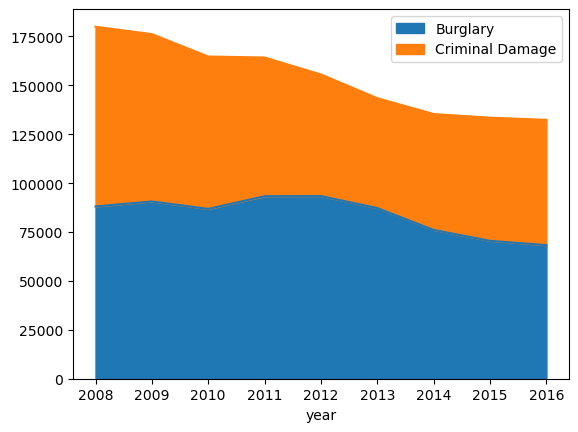

In [69]:
df_crime = df1.rename(columns={'value':'Burglary'})
df_crime['Criminal Damage'] = df2['value']

df_crime.plot.area()
plt.show()

dari hasil plot area antara kejahatan burglary dan criminal damage diatas bisa disimpulkan yaitu kejahatan criminal damage palong besar terjadi pada tahun 2008

### HISTOGRAM
data diambil dari total kejahatan setiap wilayah pada tahun 2016



In [70]:

crime_borough = df_london_crime.groupby(['borough', 'year']).sum()
crime_borough = crime_borough.reset_index('year')
crime_borough = crime_borough.loc[crime_borough['year'] == 2016]
crime_borough = crime_borough['value']
crime_borough

borough
Barking and Dagenham      16741
Barnet                    24684
Bexley                    12840
Brent                     26693
Bromley                   20164
Camden                    29183
City of London              178
Croydon                   28712
Ealing                    27127
Enfield                   22485
Greenwich                 22730
Hackney                   28265
Hammersmith and Fulham    20174
Haringey                  27174
Harrow                    13153
Havering                  16903
Hillingdon                24341
Hounslow                  22251
Islington                 27092
Kensington and Chelsea    19580
Kingston upon Thames       9983
Lambeth                   34071
Lewisham                  23904
Merton                    12755
Newham                    30090
Redbridge                 19502
Richmond upon Thames      11074
Southwark                 31636
Sutton                    10658
Tower Hamlets             29253
Waltham Forest            20716


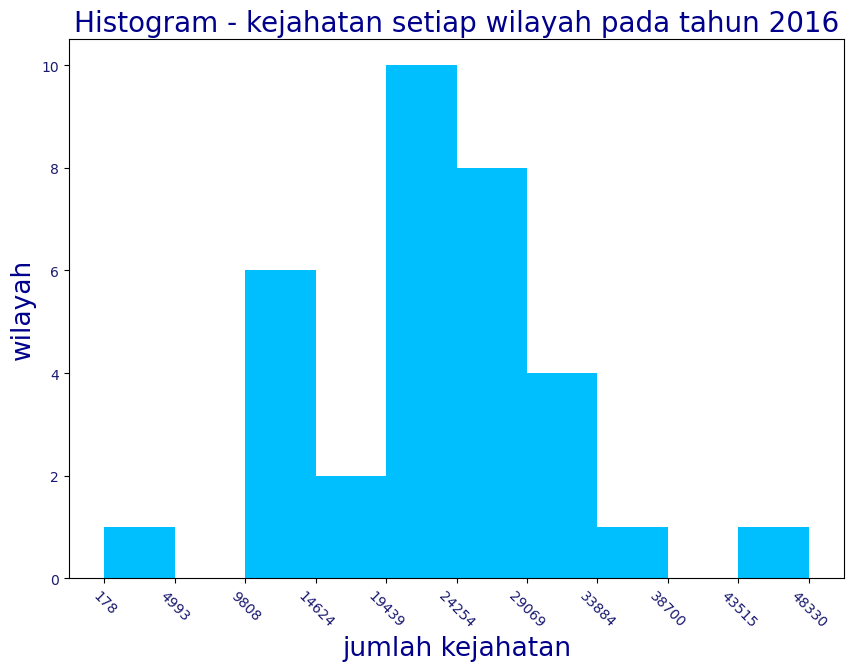

In [71]:
count, bin_edges = np.histogram(crime_borough)

crime_borough.plot(kind='hist', 
                   figsize=(10, 7),
                   color='DeepSkyBlue', 
                   xticks=bin_edges
                  )

plt.xticks(rotation=-45, color='MidnightBlue')
plt.yticks( color='MidnightBlue')

plt.title('Histogram - kejahatan setiap wilayah pada tahun 2016', fontsize=20, color='DarkBlue')

plt.ylabel('wilayah', fontsize=19, color='DarkBlue')
plt.xlabel('jumlah kejahatan', fontsize=19, color='DarkBlue')

plt.show()

### BAR CHART
data yang divisualisasikan diambil dari jumlah kejahatan berdasarkan kategori bersar/major category

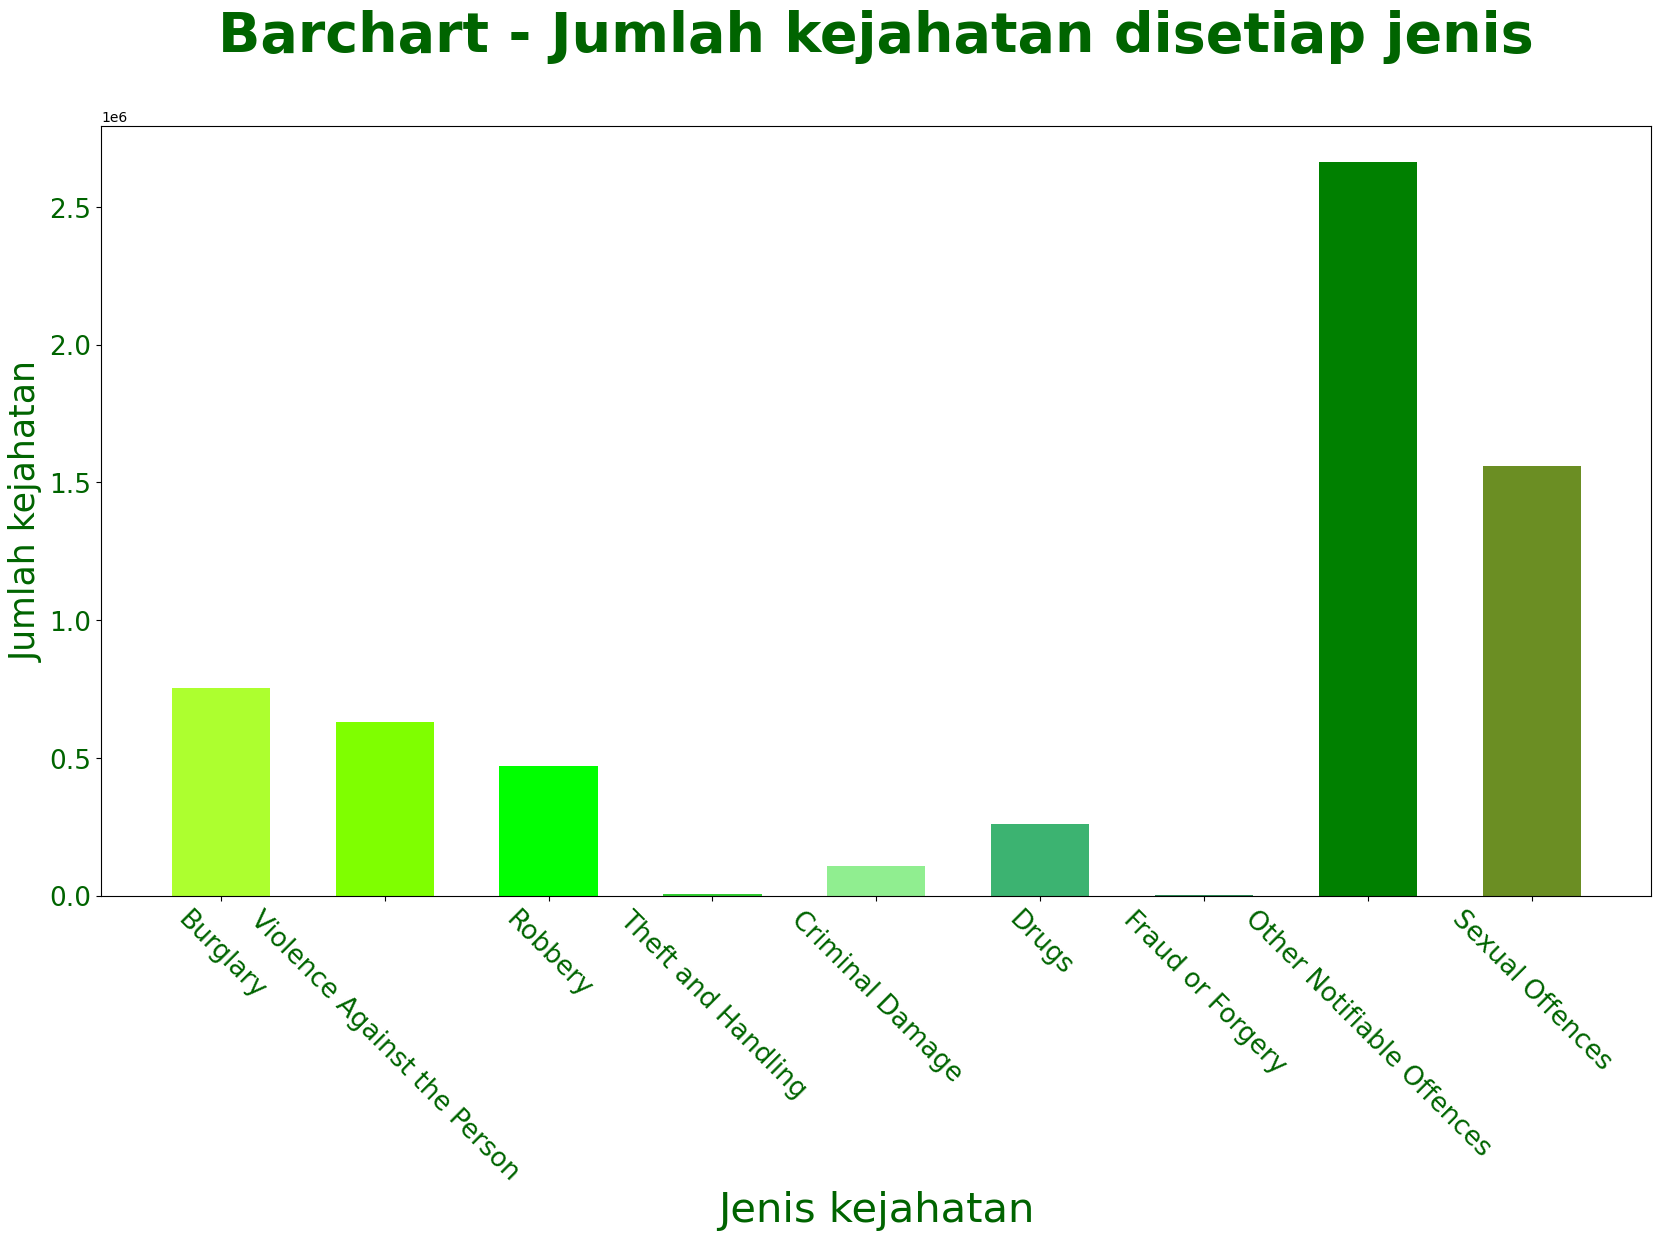

In [72]:
font = {'family': 'Franklin Gothic Medium',
        'color':  'DarkGreen',
        'weight': 'bold',
        'size': 40,
        }
label=df_london_crime['major_category'].unique()

pos = np.arange(len(label))
totals=df_london_crime.groupby('major_category').sum()
Totals=totals['value'].to_numpy()


colors1=['GreenYellow','Chartreuse','Lime','LimeGreen','LightGreen','MediumSeaGreen','SeaGreen','Green','OliveDrab']
plt.figure(figsize=(20,10))
plt.bar(pos,Totals,color=colors1,width=0.6)
plt.margins(0.05)
plt.xticks(pos, label)
plt.xlabel('Jenis kejahatan', fontsize=30,color='DarkGreen')
plt.xticks(rotation=-45)
plt.xticks(fontsize=19,color='DarkGreen')
plt.yticks(fontsize=19,color='DarkGreen')
plt.ylabel('Jumlah kejahatan', fontsize=25,color='DarkGreen')
plt.title('Barchart - Jumlah kejahatan disetiap jenis\n',fontdict=font)
plt.show()

### PIE CHART
data yang diambil yaitu jumlah kejahatan berdasarkan kategori besar

In [73]:
crime_major = df_london_crime.groupby('major_category').sum()
crime_major = crime_major['value']
crime_major



major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

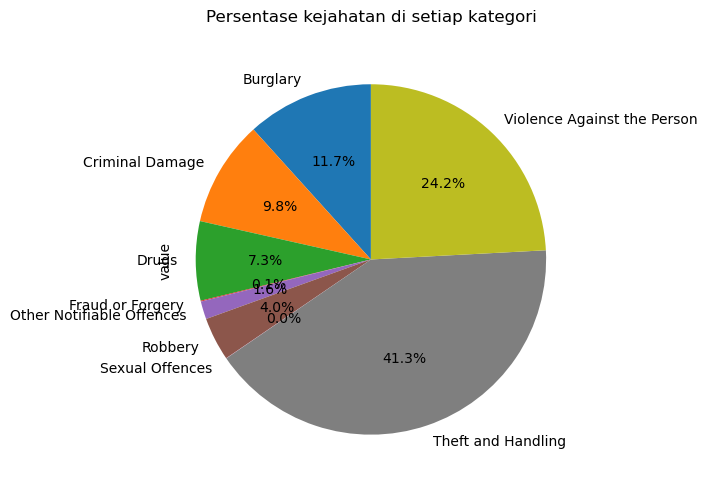

In [74]:
crime_major.plot(kind='pie',
                         figsize=(5,6),
                         autopct='%1.1f%%',
                         startangle=90,                        
                         )

plt.title('Persentase kejahatan di setiap kategori')
plt.axis('equal')

plt.show()

### Word cloud
kata yang digunakan untuk word cloud diambil dari kolom borough, major_category, dan minor_catergory

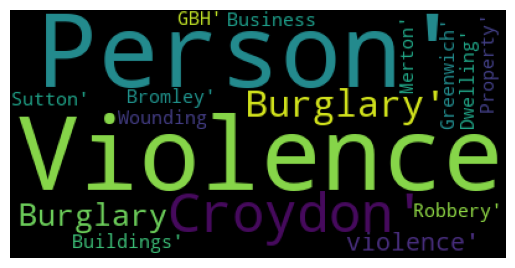

In [75]:
from wordcloud import WordCloud

text = df_london_crime[['borough','major_category','minor_category']].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Folium
London Maps

In [76]:
import folium

world_map = folium.Map(location=[51.59156389846112, -0.11441256920014851], zoom_start=9)
world_map